In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [4]:
df.shape

(10000, 4)

In [5]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


In [6]:
# checking other than numeric values in data set.

df[~df.applymap(np.isreal).all(1)]

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50
...,...,...,...,...
9995,No,No,711.56,52992.38
9996,No,No,757.96,19660.72
9997,No,No,845.41,58636.16
9998,No,No,1569.01,36669.11


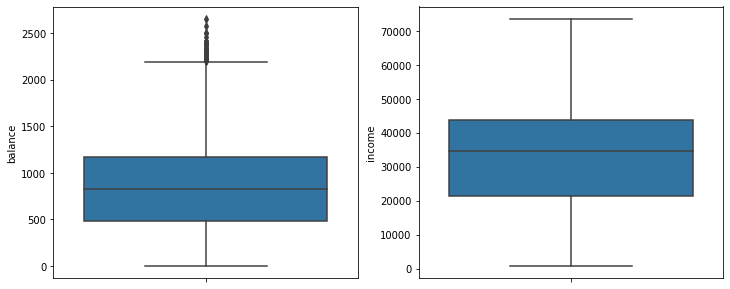

In [7]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxplot(y = df['balance'])

plt.subplot(1,2,2)
sns.boxplot(y = df['income'])
plt.show()

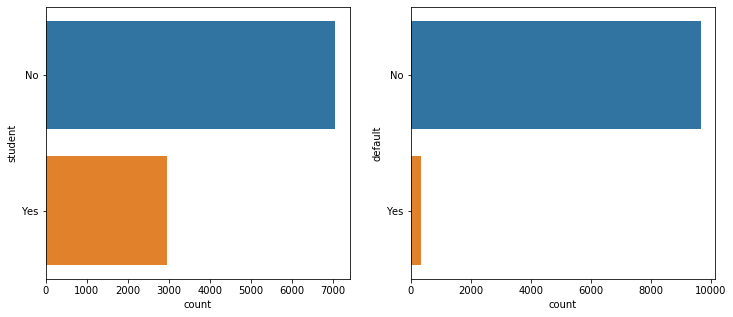

In [8]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(y = df['student'])

plt.subplot(1,2,2)
sns.countplot(y = df['default'])
plt.show()

In [18]:
print(df['student'].value_counts())
print("---------------------------------")
print(df['student'].value_counts(normalize = True).round(3))

No     7056
Yes    2944
Name: student, dtype: int64
---------------------------------
No     0.706
Yes    0.294
Name: student, dtype: float64


In [17]:
print(df['default'].value_counts())
print("---------------------------------")
print(df['default'].value_counts(normalize = True).round(3))

No     9667
Yes     333
Name: default, dtype: int64
---------------------------------
No     0.967
Yes    0.033
Name: default, dtype: float64


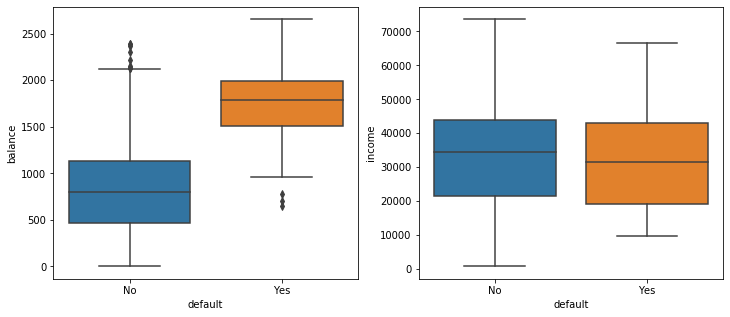

In [14]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxplot(df['default'], df['balance'])

plt.subplot(1,2,2)
sns.boxplot(df['default'], df['income'])
plt.show()

In [19]:
pd.crosstab(df['student'], df['default'], normalize='index').round(3)

default,No,Yes
student,,
No,0.971,0.029
Yes,0.957,0.043


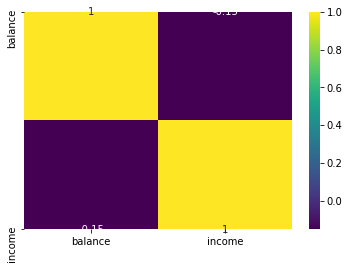

In [25]:
sns.heatmap(df[['balance', 'income']].corr(), annot=True, cmap='viridis')
plt.show()

In [26]:
df.isnull().any()

default    False
student    False
balance    False
income     False
dtype: bool

In [27]:
Q1, Q3 = df['balance'].quantile([0.25, 0.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

print(f"LL: {LL}")
print(f"UL: {UL}")

LL: -545.1262500000001
UL: 2193.16375


In [28]:
df_UL = df[df['balance'] > UL]
df_UL

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [29]:
df_UL['default'].count()

31

In [32]:
df_UL['default'].value_counts(normalize = True).round(3)

Yes    0.839
No     0.161
Name: default, dtype: float64

In [33]:
df_UL['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [34]:
df['balance'] = np.where(df['balance'] > UL, UL, df['balance'])

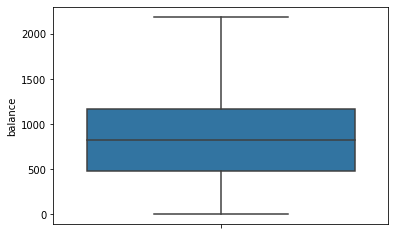

In [35]:
sns.boxplot(y = df['balance'])
plt.show()

# END